In [ ]:
# # установите библиотеки, если это необходимо
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn

In [1]:
# импорт необходимых библиотек, чтение файлов
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

receptions = pd.read_csv('receptions.csv') # приёмы врачей
population = pd.read_csv('population.csv') # прикрепленное население

## Предобработка данных
1. Поиск пустых значений и их анализ
2. Поиск дубликатов
3. Приведение данных к нужным типам

### Датафрейм receptions - приёмы врачей

In [2]:
# посмотрим структуру таблицы
receptions.head()

,REC_RCP_DATE,MO_ID,REC_ID,RCP_ID,RCP_START_DATETIME,RCP_DURATION,PATIENT_ID,GENDER,BIRTH_DATE,SPEC_GROUP,MEJI_ID,CREATE_DATE
0,2023-04-01 00:00:00,10000400,NaN,531192177.0,2023-04-01 09:23:01,7.722300,16050660,0,1952-04-02 00:00:00,Терапия,18427133265,2023-05-02 05:36:44
1,2023-04-01 00:00:00,10000400,NaN,531200448.0,2023-04-01 09:40:42,22.403350,17814079,0,1948-04-02 00:00:00,Терапия,18427133265,2023-05-02 05:36:44
2,2023-04-01 00:00:00,10000400,NaN,531260626.0,2023-04-01 11:48:35,40.998283,17016852,1,1964-10-30 00:00:00,Терапия,18427133265,2023-05-02 05:36:44
3,2023-04-01 00:00:00,10000400,NaN,531278886.0,2023-04-01 12:31:01,6.212767,16675551,0,1969-01-28 00:00:00,Терапия,18427133265,2023-05-02 05:36:44
4,2023-04-01 00:00:00,10000400,NaN,531299593.0,2023-04-01 13:20:52,5.152867,2243266771,0,1997-07-18 00:00:00,Терапия,18427133265,2023-05-02 05:36:44


In [3]:
receptions.tail()

,REC_RCP_DATE,MO_ID,REC_ID,RCP_ID,RCP_START_DATETIME,RCP_DURATION,PATIENT_ID,GENDER,BIRTH_DATE,SPEC_GROUP,MEJI_ID,CREATE_DATE
24502,2023-04-30 00:00:00,10000400,NaN,547984084.0,2023-04-30 20:59:55,5.321950,19231428,0,1945-10-19 00:00:00,Терапия,18988991842,2023-05-02 05:49:03
24503,2023-04-30 00:00:00,10000400,NaN,547984268.0,2023-04-30 21:06:51,4.261533,26273945,1,1967-01-08 00:00:00,Терапия,18988991842,2023-05-02 05:49:03
24504,2023-04-30 00:00:00,10000400,NaN,547984431.0,2023-04-30 21:12:57,2.764233,20928908,0,1980-06-15 00:00:00,Терапия,18988991842,2023-05-02 05:49:03
24505,2023-04-30 00:00:00,10000400,NaN,547984566.0,2023-04-30 21:18:03,3.071050,20449213,0,1964-09-26 00:00:00,Терапия,18988991842,2023-05-02 05:49:03
24506,2023-04-30 00:00:00,10000400,NaN,547984680.0,2023-04-30 21:22:16,4.472633,26032759,0,1955-06-11 00:00:00,Терапия,18988991842,2023-05-02 05:49:03


In [4]:
receptions.info() 
# видим, что в 4 колонках есть null значения
# оцениваем необходимость преобразования типов

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24507 entries, 0 to 24506
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   REC_RCP_DATE        24507 non-null  object 
 1   MO_ID               24507 non-null  int64  
 2   REC_ID              21988 non-null  float64
 3   RCP_ID              20354 non-null  float64
 4   RCP_START_DATETIME  20354 non-null  object 
 5   RCP_DURATION        20354 non-null  float64
 6   PATIENT_ID          24507 non-null  int64  
 7   GENDER              24507 non-null  int64  
 8   BIRTH_DATE          24507 non-null  object 
 9   SPEC_GROUP          24507 non-null  object 
 10  MEJI_ID             24507 non-null  int64  
 11  CREATE_DATE         24507 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 2.2+ MB


In [5]:
# смотрим дубликаты - их нет
receptions.duplicated().unique()

array([False])

In [6]:
# посмотрим интересующие нас колонки поближе
receptions['REC_ID'].notna().value_counts()

REC_ID
True     21988
False     2519
Name: count, dtype: int64

In [7]:
receptions[['RCP_ID', 'RCP_START_DATETIME', 'RCP_DURATION']].notna().value_counts()

RCP_ID  RCP_START_DATETIME  RCP_DURATION
True    True                True            20354
False   False               False            4153
Name: count, dtype: int64

In [8]:
# предполагаем, что NaN значения для трех столбцов совпадают
receptions[['RCP_ID', 'RCP_START_DATETIME', 'RCP_DURATION']].sort_values(by='RCP_ID')

,RCP_ID,RCP_START_DATETIME,RCP_DURATION
87,531180361.0,2023-04-01 08:56:44,8.720150
10,531181063.0,2023-04-01 08:58:43,9.784083
88,531182880.0,2023-04-01 09:02:35,14.420767
16,531183238.0,2023-04-01 09:03:27,12.576283
91,531184395.0,2023-04-01 09:06:19,10.810267
...,...,...,...
24446,NaN,NaN,NaN
24450,NaN,NaN,NaN
24456,NaN,NaN,NaN
24457,NaN,NaN,NaN


In [9]:
rec_rcp_data = receptions[['REC_ID', 'RCP_ID', 'RCP_START_DATETIME', 'RCP_DURATION']].dropna(subset=['RCP_ID'])
rec_rcp_data.info()
# удаляем отсутствующие строки, где RCP_ID == NaN (оставляем только зафиксированные приёмы)
# и проверяем, есть ли NaN в получившемся датафрейме
# результат - сохранились отсутствующие значения в колонке REC_ID, 
# что говорит о том, что в ряде случаев приём состоялся, а записи не было

<class 'pandas.core.frame.DataFrame'>
Index: 20354 entries, 0 to 24506
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   REC_ID              17835 non-null  float64
 1   RCP_ID              20354 non-null  float64
 2   RCP_START_DATETIME  20354 non-null  object 
 3   RCP_DURATION        20354 non-null  float64
dtypes: float64(3), object(1)
memory usage: 795.1+ KB


In [10]:
rec_rcp_data['REC_ID'].notna().value_counts()

REC_ID
True     17835
False     2519
Name: count, dtype: int64

#### Промежуточный вывод
Отсутствие значений в трех столбцах 'RCP_ID', 'RCP_START_DATETIME', 'RCP_DURATION' связано с тем, что приём не был зафиксирован. Вероятнее всего, он не состоялся - мы не можем учитывать эти данные. В ряде случаев (2519 записей) приём состоялся без записи

In [11]:
# для нашей задачи ключевым является именно количество посещений
# поэтому мы можем учитывать приёмы без записи
# удаляем строки с отсутствием приёма

receptions.dropna(subset=['RCP_ID'], inplace=True)

In [12]:
# переназначим индексы
receptions.reset_index(drop=True, inplace=True)

In [13]:
receptions.tail()

,REC_RCP_DATE,MO_ID,REC_ID,RCP_ID,RCP_START_DATETIME,RCP_DURATION,PATIENT_ID,GENDER,BIRTH_DATE,SPEC_GROUP,MEJI_ID,CREATE_DATE
20349,2023-04-30 00:00:00,10000400,NaN,547984084.0,2023-04-30 20:59:55,5.321950,19231428,0,1945-10-19 00:00:00,Терапия,18988991842,2023-05-02 05:49:03
20350,2023-04-30 00:00:00,10000400,NaN,547984268.0,2023-04-30 21:06:51,4.261533,26273945,1,1967-01-08 00:00:00,Терапия,18988991842,2023-05-02 05:49:03
20351,2023-04-30 00:00:00,10000400,NaN,547984431.0,2023-04-30 21:12:57,2.764233,20928908,0,1980-06-15 00:00:00,Терапия,18988991842,2023-05-02 05:49:03
20352,2023-04-30 00:00:00,10000400,NaN,547984566.0,2023-04-30 21:18:03,3.071050,20449213,0,1964-09-26 00:00:00,Терапия,18988991842,2023-05-02 05:49:03
20353,2023-04-30 00:00:00,10000400,NaN,547984680.0,2023-04-30 21:22:16,4.472633,26032759,0,1955-06-11 00:00:00,Терапия,18988991842,2023-05-02 05:49:03


In [14]:
# для нашей задачи не нужны ID организации и ID записи
# удаляем эти колонки, предварительно проверив, действительно ли все записи относятся к одной поликлинике

receptions['MO_ID'].unique()

array([10000400])

In [15]:
receptions.drop(['MO_ID', 'REC_ID'], axis=1, inplace=True)

In [16]:
receptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20354 entries, 0 to 20353
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   REC_RCP_DATE        20354 non-null  object 
 1   RCP_ID              20354 non-null  float64
 2   RCP_START_DATETIME  20354 non-null  object 
 3   RCP_DURATION        20354 non-null  float64
 4   PATIENT_ID          20354 non-null  int64  
 5   GENDER              20354 non-null  int64  
 6   BIRTH_DATE          20354 non-null  object 
 7   SPEC_GROUP          20354 non-null  object 
 8   MEJI_ID             20354 non-null  int64  
 9   CREATE_DATE         20354 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 1.6+ MB


In [17]:
# преобразуем типы колонок с датами
receptions.BIRTH_DATE = pd.to_datetime(receptions.BIRTH_DATE)
receptions.REC_RCP_DATE = pd.to_datetime(receptions.REC_RCP_DATE)
receptions.RCP_START_DATETIME = pd.to_datetime(receptions.RCP_START_DATETIME)
receptions.CREATE_DATE = pd.to_datetime(receptions.CREATE_DATE)

In [18]:
# функция преобразования значений в колонке GENDER

def convert_sex_receptions(sex: int) -> str:
    return 'Male' if sex else 'Female'

In [19]:
# сейчас там int64, что нам не подходит, я решил использовать тип category
# можно было преобразовать в булевый тип
receptions.GENDER = receptions.GENDER.apply(convert_sex_receptions)
receptions.GENDER = receptions.GENDER.astype('category')

In [20]:
# специальность врача -- тоже категориальные данные, преобразуем их
receptions.SPEC_GROUP = receptions.SPEC_GROUP.astype('category')

In [21]:
# также преобразуем ID приёма в int
receptions.RCP_ID = receptions.RCP_ID.astype('int64')

In [22]:
# длительность приёма округлим до 1 знака после запятой.
# думаю, это допустимая точность для нашей задачи
# можно оставить тип float

receptions['RCP_DURATION'] = receptions['RCP_DURATION'].round(1)

In [23]:
# убедимся, что всё прошло гладко
receptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20354 entries, 0 to 20353
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   REC_RCP_DATE        20354 non-null  datetime64[ns]
 1   RCP_ID              20354 non-null  int64         
 2   RCP_START_DATETIME  20354 non-null  datetime64[ns]
 3   RCP_DURATION        20354 non-null  float64       
 4   PATIENT_ID          20354 non-null  int64         
 5   GENDER              20354 non-null  category      
 6   BIRTH_DATE          20354 non-null  datetime64[ns]
 7   SPEC_GROUP          20354 non-null  category      
 8   MEJI_ID             20354 non-null  int64         
 9   CREATE_DATE         20354 non-null  datetime64[ns]
dtypes: category(2), datetime64[ns](4), float64(1), int64(3)
memory usage: 1.3 MB


In [24]:
receptions.head()

,REC_RCP_DATE,RCP_ID,RCP_START_DATETIME,RCP_DURATION,PATIENT_ID,GENDER,BIRTH_DATE,SPEC_GROUP,MEJI_ID,CREATE_DATE
0,2023-04-01,531192177,2023-04-01 09:23:01,7.7,16050660,Female,1952-04-02,Терапия,18427133265,2023-05-02 05:36:44
1,2023-04-01,531200448,2023-04-01 09:40:42,22.4,17814079,Female,1948-04-02,Терапия,18427133265,2023-05-02 05:36:44
2,2023-04-01,531260626,2023-04-01 11:48:35,41.0,17016852,Male,1964-10-30,Терапия,18427133265,2023-05-02 05:36:44
3,2023-04-01,531278886,2023-04-01 12:31:01,6.2,16675551,Female,1969-01-28,Терапия,18427133265,2023-05-02 05:36:44
4,2023-04-01,531299593,2023-04-01 13:20:52,5.2,2243266771,Female,1997-07-18,Терапия,18427133265,2023-05-02 05:36:44


In [25]:
receptions.tail()

,REC_RCP_DATE,RCP_ID,RCP_START_DATETIME,RCP_DURATION,PATIENT_ID,GENDER,BIRTH_DATE,SPEC_GROUP,MEJI_ID,CREATE_DATE
20349,2023-04-30,547984084,2023-04-30 20:59:55,5.3,19231428,Female,1945-10-19,Терапия,18988991842,2023-05-02 05:49:03
20350,2023-04-30,547984268,2023-04-30 21:06:51,4.3,26273945,Male,1967-01-08,Терапия,18988991842,2023-05-02 05:49:03
20351,2023-04-30,547984431,2023-04-30 21:12:57,2.8,20928908,Female,1980-06-15,Терапия,18988991842,2023-05-02 05:49:03
20352,2023-04-30,547984566,2023-04-30 21:18:03,3.1,20449213,Female,1964-09-26,Терапия,18988991842,2023-05-02 05:49:03
20353,2023-04-30,547984680,2023-04-30 21:22:16,4.5,26032759,Female,1955-06-11,Терапия,18988991842,2023-05-02 05:49:03


In [26]:
# добавим возраст на 01.05.2023
# этого не было в задании, но это может помочь в дальнейшем анализе

import datetime as dt
receptions['AGE'] = (dt.datetime(2023, 5, 1) - receptions.BIRTH_DATE).dt.days

In [27]:
# функция преобразования количества дней в количество лет

import math
def days_to_years(days) -> int:
    return math.ceil(days // 365.25)

In [28]:
receptions.AGE = receptions.AGE.apply(days_to_years) # получили возраст в годах

In [29]:
receptions.head()

,REC_RCP_DATE,RCP_ID,RCP_START_DATETIME,RCP_DURATION,PATIENT_ID,GENDER,BIRTH_DATE,SPEC_GROUP,MEJI_ID,CREATE_DATE,AGE
0,2023-04-01,531192177,2023-04-01 09:23:01,7.7,16050660,Female,1952-04-02,Терапия,18427133265,2023-05-02 05:36:44,71
1,2023-04-01,531200448,2023-04-01 09:40:42,22.4,17814079,Female,1948-04-02,Терапия,18427133265,2023-05-02 05:36:44,75
2,2023-04-01,531260626,2023-04-01 11:48:35,41.0,17016852,Male,1964-10-30,Терапия,18427133265,2023-05-02 05:36:44,58
3,2023-04-01,531278886,2023-04-01 12:31:01,6.2,16675551,Female,1969-01-28,Терапия,18427133265,2023-05-02 05:36:44,54
4,2023-04-01,531299593,2023-04-01 13:20:52,5.2,2243266771,Female,1997-07-18,Терапия,18427133265,2023-05-02 05:36:44,25


### Датафрейм population - данные о прикрепленном населении
Проделаем операции предобработки данных для второго датафрейма

In [30]:
population.head()

,PATIENT_ID,MO_ID,BIRTH_DATE,GENDER,ATTACHMENT_START_DATE,CREATE_DATE
0,10133193,10000400,1955-04-04 00:00:00,Ж,2014-01-01 00:00:00,2023-05-02 06:01:10
1,10145074,10000400,1938-03-27 00:00:00,Ж,2014-01-01 00:00:00,2023-05-02 06:01:10
2,10147030,10000400,1955-05-15 00:00:00,Ж,2015-02-16 00:00:00,2023-05-02 06:01:10
3,10152283,10000400,1979-08-06 00:00:00,Ж,2017-08-11 00:00:00,2023-05-02 06:01:10
4,10207712,10000400,1954-10-21 00:00:00,М,2014-01-01 00:00:00,2023-05-02 06:01:10


In [31]:
population.info() # пустых значений нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92850 entries, 0 to 92849
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   PATIENT_ID             92850 non-null  int64 
 1   MO_ID                  92850 non-null  int64 
 2   BIRTH_DATE             92850 non-null  object
 3   GENDER                 92850 non-null  object
 4   ATTACHMENT_START_DATE  92850 non-null  object
 5   CREATE_DATE            92850 non-null  object
dtypes: int64(2), object(4)
memory usage: 4.3+ MB


In [32]:
# преобразуем даты в тип datetime
population.BIRTH_DATE = pd.to_datetime(population.BIRTH_DATE)
population.ATTACHMENT_START_DATE = pd.to_datetime(population.ATTACHMENT_START_DATE)
population.CREATE_DATE = pd.to_datetime(population.CREATE_DATE)

In [33]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92850 entries, 0 to 92849
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   PATIENT_ID             92850 non-null  int64         
 1   MO_ID                  92850 non-null  int64         
 2   BIRTH_DATE             92850 non-null  datetime64[ns]
 3   GENDER                 92850 non-null  object        
 4   ATTACHMENT_START_DATE  92850 non-null  datetime64[ns]
 5   CREATE_DATE            92850 non-null  datetime64[ns]
dtypes: datetime64[ns](3), int64(2), object(1)
memory usage: 4.3+ MB


In [34]:
population.tail()

,PATIENT_ID,MO_ID,BIRTH_DATE,GENDER,ATTACHMENT_START_DATE,CREATE_DATE
92845,6417522173036,10000400,1944-03-30,Ж,2019-01-25,2023-05-02 06:01:10
92846,18223706578036,10000400,1940-08-11,Ж,2019-08-01,2023-05-02 06:01:10
92847,30000003839562,10000400,1957-07-09,Ж,2021-03-09,2023-05-02 06:01:10
92848,30000007680654,10000400,1958-11-08,Ж,2020-12-30,2023-05-02 06:01:10
92849,30000009061794,10000400,1958-01-01,Ж,2021-06-08,2023-05-02 06:01:10


In [35]:
# убедимся, что в GENDER два значения
population.GENDER.unique() 

array(['Ж', 'М'], dtype=object)

In [36]:
# функция преобразования данных в колонке GENDER
def change_sex_population(sex: str) -> str:
    return 'Male' if sex == 'М' else 'Female'    

In [37]:
population.GENDER = population.GENDER.apply(change_sex_population)

In [38]:
# преобразуем тип
population.GENDER = population.GENDER.astype('category')

In [39]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92850 entries, 0 to 92849
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   PATIENT_ID             92850 non-null  int64         
 1   MO_ID                  92850 non-null  int64         
 2   BIRTH_DATE             92850 non-null  datetime64[ns]
 3   GENDER                 92850 non-null  category      
 4   ATTACHMENT_START_DATE  92850 non-null  datetime64[ns]
 5   CREATE_DATE            92850 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](3), int64(2)
memory usage: 3.6 MB


In [40]:
# убедимся, что работаем с данными по одной поликлинике
population.MO_ID.unique()

array([10000400])

In [41]:
# дубликатов нет
population.duplicated().unique()

array([False])

In [42]:
# удаляем колонку c ID поликлиники
population.drop(['MO_ID'], axis=1, inplace=True) 

In [43]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92850 entries, 0 to 92849
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   PATIENT_ID             92850 non-null  int64         
 1   BIRTH_DATE             92850 non-null  datetime64[ns]
 2   GENDER                 92850 non-null  category      
 3   ATTACHMENT_START_DATE  92850 non-null  datetime64[ns]
 4   CREATE_DATE            92850 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](3), int64(1)
memory usage: 2.9 MB


In [44]:
# добавляем колонку - возраст каждого пациента на момент 01.05.2023
# получаем результат в днях (тип timedelta)

population['AGE'] = (dt.datetime(2023, 5, 1) - population.BIRTH_DATE).dt.days

In [45]:
# получаем возраст в годах
# функция days_to_years определена ранее

population.AGE = population.AGE.apply(days_to_years)

In [46]:
# убеждаемся, что все корректно
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92850 entries, 0 to 92849
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   PATIENT_ID             92850 non-null  int64         
 1   BIRTH_DATE             92850 non-null  datetime64[ns]
 2   GENDER                 92850 non-null  category      
 3   ATTACHMENT_START_DATE  92850 non-null  datetime64[ns]
 4   CREATE_DATE            92850 non-null  datetime64[ns]
 5   AGE                    92850 non-null  int64         
dtypes: category(1), datetime64[ns](3), int64(2)
memory usage: 3.6 MB


In [47]:
population.head()

,PATIENT_ID,BIRTH_DATE,GENDER,ATTACHMENT_START_DATE,CREATE_DATE,AGE
0,10133193,1955-04-04,Female,2014-01-01,2023-05-02 06:01:10,68
1,10145074,1938-03-27,Female,2014-01-01,2023-05-02 06:01:10,85
2,10147030,1955-05-15,Female,2015-02-16,2023-05-02 06:01:10,67
3,10152283,1979-08-06,Female,2017-08-11,2023-05-02 06:01:10,43
4,10207712,1954-10-21,Male,2014-01-01,2023-05-02 06:01:10,68


In [48]:
population.tail()

,PATIENT_ID,BIRTH_DATE,GENDER,ATTACHMENT_START_DATE,CREATE_DATE,AGE
92845,6417522173036,1944-03-30,Female,2019-01-25,2023-05-02 06:01:10,79
92846,18223706578036,1940-08-11,Female,2019-08-01,2023-05-02 06:01:10,82
92847,30000003839562,1957-07-09,Female,2021-03-09,2023-05-02 06:01:10,65
92848,30000007680654,1958-11-08,Female,2020-12-30,2023-05-02 06:01:10,64
92849,30000009061794,1958-01-01,Female,2021-06-08,2023-05-02 06:01:10,65


## Исследовательский анализ данных
1. Изучить распределение населения по возрасту и полу. Построить соответствующие визуализации
2. Изучить время приёма пациентов. Посчитать среднее и медианное время. Описать, сколько обычно занимает приём пациента. Ответить на вопрос: Когда можно считать, что приём прошёл очень быстро, а когда необычно долго?
3. Убрать редкие и выбивающиеся значения. Описать, какие особенности я обнаружил в данных
4. Ответить на вопрос: Какие факторы больше всего влияют на количество приёмов? Изучить, зависит ли количество приёмов от возраста и пола пациента. При необходимости построить визуализацию.
5. Выбрать 5 пациентов с наибольшим числом приёмов терапевта. Посещали ли эти пациенты других специалистов в данной организации?

### Изучение распределения населения по возрасту и полу

In [49]:
# распределение населения по полу
population.GENDER.value_counts()

GENDER
Female    53217
Male      39633
Name: count, dtype: int64

Text(0, 0.5, '')

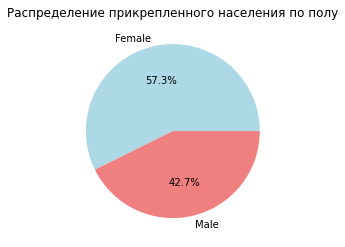

In [50]:
plt.figure()
population['GENDER'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Распределение прикрепленного населения по полу')
plt.ylabel('')

Text(0, 0.5, 'Частота')

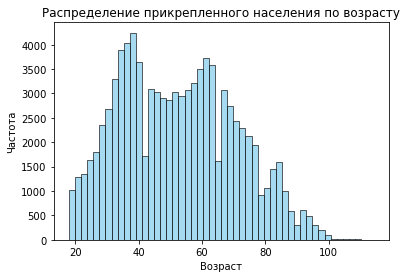

In [93]:
# распределение населения по возрасту
plt.figure()
sns.histplot(population['AGE'], bins=50, color='skyblue')
plt.title('Распределение прикрепленного населения по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Частота')

In [52]:
population['AGE'].describe()

count    92850.000000
mean        52.314798
std         18.217607
min         18.000000
25%         37.000000
50%         52.000000
75%         66.000000
max        114.000000
Name: AGE, dtype: float64

#### Промежуточный вывод
Население по полу распределено неравномерно - женщин 57.3%, мужчин 42.7%.  
Относительное количество женщин превышает данные в среднем по Москве: на 2023 год - 52% женщины, 48% мужчины  
Средний возраст прикрепленных - 52 года, максимальный - 114 лет  

### Изучение времени приёма пациентов

In [53]:
# среднее и медианное время приёма
mean_duration = receptions['RCP_DURATION'].mean()
median_duration = receptions['RCP_DURATION'].median()
# стандартное отклонение
std_duration = receptions['RCP_DURATION'].std()

In [54]:
mean_duration

13.272747371524025

In [55]:
median_duration

11.8

In [56]:
std_duration

8.093322656014392

In [57]:
# одно стандартное отклонение - 68.2% - по 34.1% в обе стороны от медианы (50%)
# нижний порог - квантиль 0.159, верхний порог - 0.841

receptions["RCP_DURATION"].quantile(0.159)

6.8

In [58]:
receptions['RCP_DURATION'].quantile(0.841)

19.1

#### Промежуточный вывод
Стандартное отклонение 8.09 мин., по нему можно судить о вариабельности значений - насколько сильно значения отличаются от медианного.   
Также мы получили верхний и нижний порог длительности - по этим данным мы можем считать, что приём прошёл очень быстро, когда время составило меньше 6.8 минут. Приём значительно затянулся, если время составило больше 19.1 минуты. Среднее время приёма составляет 11.8 минут.  
Однако, при анализе времени приёма нужно учитывать специальность врача, проводившего приём - т.к. у них разные нормативы.  

Посчитаем медианное время приёма и верхний и нижний порог в зависимости от специальности:

In [59]:
specs = list(receptions['SPEC_GROUP'].unique()) # список всех специальностей
median_by_specs = {s: [] for s in specs} # словарь-заготовка, наполним его в цикле
for s in specs:
    duration_by_spec = receptions.query(f"SPEC_GROUP == '{s}'")['RCP_DURATION']
    median = duration_by_spec.median()
    low_threshhold = duration_by_spec.quantile(0.159)
    high_threshhold = duration_by_spec.quantile(0.841)
    median_by_specs[s].extend([median, low_threshhold, high_threshhold])


median_by_specs = pd.DataFrame(median_by_specs, index=['median', 'low', 'high'])
median_by_specs

,Терапия,Урология,Хирургия,Оториноларингология,Офтальмология,Акушерство и гинекология
median,12.4,11.5,10.1,11.7,11.8,8.3
low,6.7,7.6,5.2,8.5,8.2,5.5
high,20.3,16.7,18.2,16.6,16.3,12.6


#### Промежуточный вывод
В разбивке по специальностям среднее время приёма варьируется от 8.3 минут (гинекологи) до 12.4 (терапевты).

По последней таблице можно судить о том, когда приём прошёл очень быстро, а когда необычно долго. Например, для терапевтов нижний порог 6.6 минут, верхний - 20.3 минут. Для гинекологов - 8.3 и 12.6 

Для полной оценки можно учесть нормативы длительности приёма по каждой специальности. Так мы сможем понять, к чему стремиться, и какая доля врачей выполняет норматив.

### Убираем редкие и выбивающиеся значения

Text(0.5, 1.0, 'Выбросы в длительности приёма')

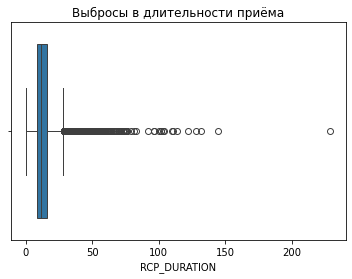

In [60]:
# посмотрим на выбросы в колонке "длительность приёма"
# воспользуемся методом boxplot (т.н. "ящик с усами") библиотеки seaborn

sns.boxplot(x=receptions['RCP_DURATION'])
plt.title('Выбросы в длительности приёма')
# по таблице понятно, что выбросы есть

In [61]:
# исключим из выборки редкие и выбивающиеся значения
# один из методов для этого - использование межквартильного расстояния
Q1 = receptions['RCP_DURATION'].quantile(0.25) # первая квартиль
Q3 = receptions['RCP_DURATION'].quantile(0.75) # третья квартиль
IQR = Q3 - Q1

# определяем границы выбросов по формуле
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# фильтруем данные, исключая выбросы
receptions_filtered = receptions.query(f'RCP_DURATION >= {lower_bound} and RCP_DURATION <= {upper_bound}')

In [62]:
# посмотрим минимальное, медианное и максимальное время приёма для отфильтрованных данных
receptions_filtered['RCP_DURATION'].min()

0.3

In [63]:
receptions_filtered['RCP_DURATION'].median()

11.6

In [64]:
receptions_filtered['RCP_DURATION'].max()

28.5

In [65]:
# сколько всего выбивающихся данных
len(receptions.query("RCP_DURATION > 28.5"))

740

#### Промежуточный вывод
Выбросы наблюдаются только "сверху" - верхний порог длительности приёма - 28.5 минут, данные больше которого можно считать выбросами. Количество таких данных - 740.
Вероятно, часть выбросов связана с тем, что вовремя не отмечается окончание приёма в системе. 
Имеет смысл посмотреть, удобно ли реализовано закрытие приёма для пользователя, есть ли возможность добавить уведомление. Эти меры позволят добиться своевременного закрытия приёма.

In [66]:
# посмотрим на количество выбивающихся значений по специальностям
# оценим соотношение выбивающихся значений к общему количеству приёмов врачей по каждой специальности

specs = list(receptions['SPEC_GROUP'].unique()) # список всех специальностей
outliers = {}
high_threshhold = receptions_filtered['RCP_DURATION'].max()

for s in specs:
    outlie_count = len(receptions.query(f'SPEC_GROUP == "{s}" and RCP_DURATION > {high_threshhold}')["RCP_DURATION"])
    count_all = len(receptions.query(f'SPEC_GROUP == "{s}"'))
    outliers[s] = round(outlie_count / count_all * 100, 2)
    
outliers = pd.Series(outliers.values(), index=outliers.keys())
outliers


Терапия                     4.88
Урология                    1.77
Хирургия                    2.36
Оториноларингология         0.54
Офтальмология               0.51
Акушерство и гинекология    1.34
dtype: float64

#### Промежуточный вывод
Процент приёмов, длительность которых выше верхнего порога, больше всего у терапевтов (4.88 % всех приёмов) и хирургов (2.36 %). Именно с врачей этих специальностей стоит начать мероприятия по уменьшению длительности приёма

Text(0, 0.5, 'Частота')

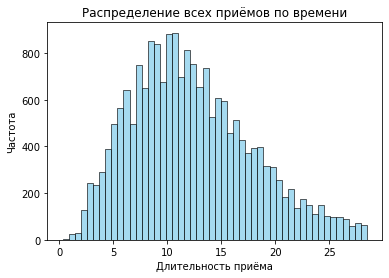

In [67]:
# оценим распределение всех приёмов по длительности - на отфильтрованных данных
plt.figure()
sns.histplot(receptions_filtered['RCP_DURATION'], bins=50, color='skyblue')
plt.title('Распределение всех приёмов по времени')
plt.xlabel('Длительность приёма')
plt.ylabel('Частота')

In [68]:
# распределение не соответствует нормальному
# посмотрим describe отфильтрованных данных
receptions_filtered.RCP_DURATION.describe()

count    19614.000000
mean        12.280646
std          5.579362
min          0.300000
25%          8.100000
50%         11.600000
75%         15.800000
max         28.500000
Name: RCP_DURATION, dtype: float64

In [69]:
# изучим взаимосвязь между конкретным врачом и длительностью приёма
# посмотрим на количество приёмов каждого врача
# общее количество врачей
len(receptions['MEJI_ID'].unique())

52

In [70]:
# для каждого врача посчитаем медианное время приёма
doctors = receptions['MEJI_ID'].unique()
median_by_doctor = {}
for d in doctors:
    median_time = receptions.query(f'MEJI_ID == {d}')['RCP_DURATION'].median()
    median_by_doctor[d] = round(median_time, 2)
    
median_by_doctor = pd.Series(median_by_doctor.values(), index=median_by_doctor.keys(), name='median_rcp_time')
median_by_doctor.sort_values(ascending=False)

18182090372    22.30
18564027711    19.80
16219339675    18.30
18988991842    18.25
19970099190    18.15
17153111404    17.50
19297306010    17.20
16221445944    16.05
19580576907    15.70
15977459538    15.70
18971587101    15.30
12973877125    14.95
20024416004    14.75
17960640671    14.50
19853036324    14.40
18061670073    14.35
19055991632    13.90
15993185505    13.60
9360260671     13.40
18941091096    13.40
19122366314    13.35
16087616794    13.30
9294971541     13.20
16507911333    12.75
12898172930    12.70
19294958223    12.60
16093445886    12.50
16100060672    12.50
20060078954    11.85
20005754936    11.80
9365647571     11.50
18974984085    11.40
18427133265    11.25
17564850690    10.80
19083619227    10.55
17354481658    10.40
17554837400    10.30
18933972590    10.20
19768086892     9.80
16390640725     9.70
19370722948     9.70
19055993692     9.40
18879427127     9.20
18065675378     9.15
18419622553     9.10
17346284302     8.70
18929849853     8.40
18806945522  

In [71]:
# получим врачей, медианная длительность приёма которых выше медианной для всех врачей
median = receptions['RCP_DURATION'].median()
median_by_doctor.sort_values(ascending=False)[median_by_doctor > median]

18182090372    22.30
18564027711    19.80
16219339675    18.30
18988991842    18.25
19970099190    18.15
17153111404    17.50
19297306010    17.20
16221445944    16.05
19580576907    15.70
15977459538    15.70
18971587101    15.30
12973877125    14.95
20024416004    14.75
17960640671    14.50
19853036324    14.40
18061670073    14.35
19055991632    13.90
15993185505    13.60
9360260671     13.40
18941091096    13.40
19122366314    13.35
16087616794    13.30
9294971541     13.20
16507911333    12.75
12898172930    12.70
19294958223    12.60
16093445886    12.50
16100060672    12.50
20060078954    11.85
Name: median_rcp_time, dtype: float64

#### Промежуточный вывод
Есть ряд врачей, которые проводят приём дольше других. 
Это один из факторов, влияющих на длительность приёма. 
Способ повлиять на это - провести работу с врачами, узнать какие у них сложности в работе и скорректировать их.
Нужно учесть специальности этих врачей и нормативы по этим специальностям.

### Изучение факторов, которые влияют на количество приёмов

In [72]:
len(receptions.PATIENT_ID.unique()) # количество пациентов

11692

In [73]:
# Посмотрим количество приёмов на каждого пациента
# используем отфильтрованные (без выбросов) данные для этой задачи
# первым этапом получим датафрейм с количеством приёмов для каждого пациента

rcp_counts = receptions_filtered['PATIENT_ID'].value_counts()
rcp_counts = pd.DataFrame({'PATIENT_ID': rcp_counts.index, 'count': rcp_counts}).reset_index(drop=True)
rcp_counts

,PATIENT_ID,count
0,18745906,10
1,29545370,10
2,10371325,10
3,16952789,9
4,26012388,9
...,...,...
11465,17613329,1
11466,171833678036,1
11467,28674024,1
11468,28554741,1


In [74]:
# соединим таблицы. выбираем тип merge - inner (выбран по умолчанию) 

rcp_counts = rcp_counts.merge(receptions_filtered, on='PATIENT_ID')
rcp_counts

,PATIENT_ID,count,REC_RCP_DATE,RCP_ID,RCP_START_DATETIME,RCP_DURATION,GENDER,BIRTH_DATE,SPEC_GROUP,MEJI_ID,CREATE_DATE,AGE
0,18745906,10,2023-04-14,539456963,2023-04-14 17:38:20,18.2,Female,1949-05-27,Урология,17346284302,2023-05-02 05:41:42,73
1,18745906,10,2023-04-14,539422306,2023-04-14 16:39:57,7.7,Female,1949-05-27,Акушерство и гинекология,18806945522,2023-05-02 05:41:42,73
2,18745906,10,2023-04-17,540419637,2023-04-17 12:58:00,16.2,Female,1949-05-27,Урология,17346284302,2023-05-02 05:42:56,73
3,18745906,10,2023-04-12,537663066,2023-04-12 10:02:30,11.1,Female,1949-05-27,Терапия,19768086892,2023-05-02 05:41:42,73
4,18745906,10,2023-04-21,543100037,2023-04-21 10:23:15,11.5,Female,1949-05-27,Урология,17346284302,2023-05-02 05:45:25,73
...,...,...,...,...,...,...,...,...,...,...,...,...
19609,17613329,1,2023-04-11,536953909,2023-04-11 10:21:37,22.0,Female,1952-07-17,Хирургия,19055993692,2023-05-02 05:40:26,70
19610,171833678036,1,2023-04-11,536943143,2023-04-11 10:11:42,4.5,Male,1991-10-10,Терапия,19303021279,2023-05-02 05:40:26,31
19611,28674024,1,2023-04-11,536968236,2023-04-11 10:34:19,11.9,Female,1932-05-01,Терапия,16221445944,2023-05-02 05:40:26,90
19612,28554741,1,2023-04-11,536945612,2023-04-11 10:13:59,26.3,Female,1974-03-31,Терапия,19970099190,2023-05-02 05:40:26,49


In [75]:
# посмотрим на взаимосвязь возраста и количества посещений
age_rcp = {}
ages = sorted(rcp_counts['AGE'].unique())
for age in ages:
    age_rcp[age] = rcp_counts.query(f'AGE == {age}')['count'].sum()

# индексы - возраст, значение - количество посещений всех пациентов этого возраста
age_rcp = pd.Series(age_rcp.values(), index=ages) 
age_rcp 

18     310
19     412
20     333
21     428
22     275
      ... 
97       6
98       1
99       2
100      1
101      1
Length: 84, dtype: int64

In [76]:
# получим датафрейм с колонками возраст и количеством посещений в этом возрасте
age_rcp_df = pd.DataFrame({'age': age_rcp.index, 'counts': age_rcp}).reset_index(drop=True)
age_rcp_df

,age,counts
0,18,310
1,19,412
2,20,333
3,21,428
4,22,275
...,...,...
79,97,6
80,98,1
81,99,2
82,100,1


In [77]:
# узнаем максимальное количество обращений и в каком возрасте
max_recipies_age = age_rcp.max()
max_age = age_rcp_df.query(f'counts == {age_rcp.max()}')['age']

In [78]:
max_recipies_age

1607

In [79]:
max_age # 66 лет

48    66
Name: age, dtype: int64

Text(0, 0.5, 'Количество посещений')

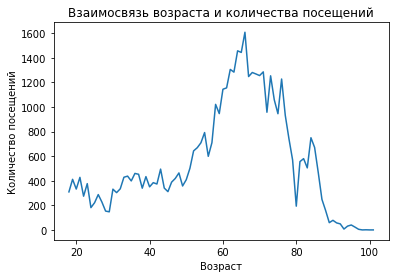

In [80]:
# визуализация
plt.figure()
plt.plot(age_rcp)
plt.title('Взаимосвязь возраста и количества посещений')
plt.xlabel('Возраст')
plt.ylabel('Количество посещений')

#### Промежуточный вывод
Зависимость количества приёмов от возраста пациентов нелинейная.   
В возрасте 25-30 лет наблюдается небольшое снижение количества обращений.  
После 30 лет количество обращений увеличивается до 66 лет (пик - 1607 приёмов).      
Наблюдается спад в районе 75-80 лет с последующим увеличением обращений примерно до 85 лет.  
После 85 лет постепенное снижение.  

In [81]:
# оценим зависимость количества приёмов от пола

number_of_rcp = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] # количество приёмов
counts_sex = {'Female': [], 'Male': [], 'number_of_rcp': number_of_rcp}
for n in number_of_rcp:
    gender_count = rcp_counts.query(f'count == {n}')['GENDER'].value_counts()
    counts_sex['Female'].append(gender_count['Female'])
    counts_sex['Male'].append(gender_count['Male'])

counts_sex = pd.DataFrame(counts_sex)

In [82]:
counts_sex_df = pd.DataFrame(counts_sex)

In [83]:
counts_sex_df

,Female,Male,number_of_rcp
0,4059,2479,1
1,3746,2080,2
2,2439,1353,3
3,1180,732,4
4,565,275,5
5,288,162,6
6,126,42,7
7,16,24,8
8,18,0,9
9,10,20,10


In [84]:
# рассчитаем корреляцию между мужчинами и количеством приёмов и корреляцию между женщинами и количеством приёмов
# используем коэффициент Пирсона

pearson_corr_male = counts_sex_df['Male'].corr(counts_sex_df['number_of_rcp'])
pearson_corr_female = counts_sex_df['Female'].corr(counts_sex_df['number_of_rcp'])

# сравним разницу в степени корреляции - если она значительна, значит зависимость от пола есть,
# если нет - зависимости от пола нет
abs(pearson_corr_male - pearson_corr_female)

0.003934128317840124

Разница незначительная, что говорит об отсутствии зависимости между полом и количеством приёмов

<AxesSubplot:xlabel='number_of_rcp'>

<Figure size 432x288 with 0 Axes>

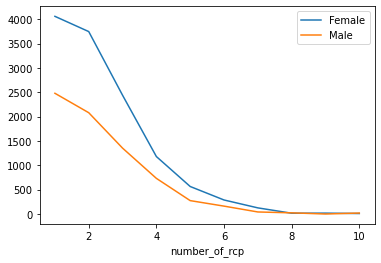

In [85]:
# визуализируем данные
plt.figure()
counts_sex_df.plot(x='number_of_rcp', y=['Female', 'Male'])

#### Промежуточный вывод
Судя по полученным данным и по графику значимой зависимости между полом и количеством приёмов нет

### Выбор 5 пациентов с наибольшим числом приёмов терапевта

In [86]:
receptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20354 entries, 0 to 20353
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   REC_RCP_DATE        20354 non-null  datetime64[ns]
 1   RCP_ID              20354 non-null  int64         
 2   RCP_START_DATETIME  20354 non-null  datetime64[ns]
 3   RCP_DURATION        20354 non-null  float64       
 4   PATIENT_ID          20354 non-null  int64         
 5   GENDER              20354 non-null  category      
 6   BIRTH_DATE          20354 non-null  datetime64[ns]
 7   SPEC_GROUP          20354 non-null  category      
 8   MEJI_ID             20354 non-null  int64         
 9   CREATE_DATE         20354 non-null  datetime64[ns]
 10  AGE                 20354 non-null  int64         
dtypes: category(2), datetime64[ns](4), float64(1), int64(4)
memory usage: 1.4 MB


In [87]:
patients_spec = receptions[['PATIENT_ID', 'SPEC_GROUP']]

In [88]:
patients_spec.query('SPEC_GROUP == "Терапия"')

,PATIENT_ID,SPEC_GROUP
0,16050660,Терапия
1,17814079,Терапия
2,17016852,Терапия
3,16675551,Терапия
4,2243266771,Терапия
...,...,...
20349,19231428,Терапия
20350,26273945,Терапия
20351,20928908,Терапия
20352,20449213,Терапия


In [89]:
# 5 пациентов с максимальным количеством посещений терапевта
patients_max_therapy = patients_spec.query('SPEC_GROUP == "Терапия"')['PATIENT_ID'].value_counts().head(5)
patients_max_therapy

PATIENT_ID
22847226          7
16093884          6
21923475          6
30000008930606    6
28319984          6
Name: count, dtype: int64

In [90]:
# конвертация в список ID
patients_max_therapy_lst = patients_max_therapy.index.tolist()
patients_max_therapy_lst

[22847226, 16093884, 21923475, 30000008930606, 28319984]

In [91]:
# посещали ли эти пациенты других специалистов в этом ЛПУ?
max_patients_all_spec = {i:[] for i in patients_max_therapy_lst}
for i in patients_max_therapy_lst:
    all_spec = patients_spec.query(f'PATIENT_ID == {i}')
    amount_spec = all_spec['SPEC_GROUP'].value_counts()
    for s in amount_spec:
        max_patients_all_spec[i].append(s)

max_patients_all_spec 
# получили словарь, где ключи это ID, а значения - список с количествами посещений врачей всех специальностей
max_patients_all_spec = pd.DataFrame(max_patients_all_spec, index=patients_spec['SPEC_GROUP'].unique())
# посещение всех специалистов пациентами, у которых больше всего приёмов терапевта
max_patients_all_spec

,22847226,16093884,21923475,30000008930606,28319984
Терапия,7,6,6,6,6
Урология,1,1,2,1,0
Хирургия,0,1,0,1,0
Оториноларингология,0,0,0,0,0
Офтальмология,0,0,0,0,0
Акушерство и гинекология,0,0,0,0,0


#### Промежуточный вывод
Мы определили 5 пациентов с наибольшим числом приёмов терапевта:  
22847226, 16093884, 21923475, 30000008930606, 28319984  
Посещение этими пациентами других специалистов:  
22847226 - уролога 1 раз  
16093884 - уролога и хирурга по 1 разу  
21923475 - уролога 2 раза  
30000008930606 - уролога и хирурга по 1 разу  
28319984 - других специалистов не посещал

## Заключение

В соответствии с условием задания был проведен анализ данных. Изучалось прикрепленное к поликлинике население и приёмы врачей в этой поликлинике.  
В ходе анализа выявлено:  

1. **Отсутствие некоторых данных**: Отсутствуют значения в столбцах 'RCP_ID', 'RCP_START_DATETIME', 'RCP_DURATION', что связано с незафиксированными приёмами. Также выявлены случаи (2519 случаев), когда приём состоялся, но на него не было записи.

2. **Распределение населения по полу**: Распределение населения по полу неравномерно: женщин 57.3%, мужчин 42.7%. Количество женщин превышает среднюю долю женского населения в Москве (52% женщины, 48% мужчины). Средний возраст прикрепленных составляет 52 года, а максимальный возраст - 114 лет.

3. **Длительность приёма**: Обычно приём пациента занимает 11.8 минут. Пределы для оценки длительности приёма: меньше 6.8 минут - очень быстро, больше 19.1 минуты - необычно долго.

4. **Длительность приёма по специальностям**: Медианное время приёма варьируется от 8.3 минут (гинекологи) до 12.4 минут (терапевты). Врачи терапевты и хирурги чаще превышают верхний порог длительности приёма.

5.  **Анализ конкретных врачей**: Некоторые врачи проводят приём дольше других. Если провести работу с этой группой, выяснить сложности, которые у них возникают в работе и скорректировать их, мы можем добиться уменьшения времени приёма.

6.  **Выбросы и статистика по длительности приёма**: Выявлены выбросы (740 записей), все они значительно превышают медианную длительность приёма. Доля таких приёмов наибольшая у терапевтов (4.88% всех приёмов) и хирургов (2.36%).

7.  **Зависимость количества приёмов от возраста**: Обнаружена нелинейная зависимость количества приёмов от возраста пациентов. Снижение количества обращений в возрасте 25-30 лет, увеличение в диапазоне 30-66 лет вплоть до пика в 66 лет (1607 приёмов). В возрасте 75-80 лет наблюдается резкий спад с последующим увеличением обращений примерно до 85 лет. После 85 лет постепенное снижение.

8.  **Зависимость количества приёмов от пола**: Не обнаружена значимая зависимость между полом пациента и количеством приёмов.

9. **Пациенты с наибольшим количеством посещений терапевтов**: Найдены пациенты с наибольшим числом приёмов терапевтов. Определено количество посещений других специалистов для этих пациентов.